# * Kurapati Venkatesh

# * 09012021

# * Topic: Lasso & Ridge Regression  ✨🐱‍🏍

# ---------------------------------------------------------------------------

## Problem Statement:

## An Analytics Company has been tasked by a crucial job of  finding out what factors does affect a startup company and will it be profitable to do so or not. For this, they have collected some historical data and would like to applying supervised predictive learning algorithm such as Lasso Ridge Regression on it and provide brief insights about their data. Predict Profit, given different attributes for various startup companies.

## -----------------------------------------------------------------------------------

### Problem Objective:
##### To prepare a prediction model  - To perform the Lasso and Ridge regression on the given data to predict the profit of the startup companies

## -------------------------------------------------------------------------------------------

## import libraries:

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import the classes we need to test linear, ridge, and lasso to compare
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV

#Need these for selecting the best model
from sklearn.model_selection import KFold, GridSearchCV

#These will be our main evaluation metrics 
from sklearn.metrics import r2_score, mean_squared_error

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

# Will use this to "normalize" our data.
from sklearn.preprocessing import normalize

## import dataset:

In [4]:
dataset = pd.read_csv(r"G:\360digit\assignments meterial\lasso ridge regression\50_Startups (1).csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


To keep this simple, I am only going to look at the continous variables, so we need to drop the State Column.

In [5]:
#drop the column
dataset = dataset.drop(columns = ['State'])
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [15]:
#shape of our dataset
dataset.shape

(50, 4)

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [17]:
#checking for missing data
dataset.isnull().sum()
#there is no missing value in the data

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [18]:
dataset.describe(include="all")

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Visualising Dataset:

NameError: name 'sns' is not defined

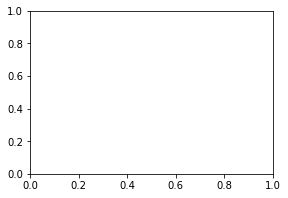

In [19]:
#Box Plot of independent variables an it seems we dont have outliers in our independent varables
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),dataset.columns):
    plt.subplot(1,4,i)
    sns.boxplot(x=col,data=dataset,color='pink')
    plt.title(f"Box Plot of {col}")
    plt.tight_layout()

In [ ]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),dataset.columns):
    plt.subplot(1,4,i)
    sns.distplot(a=dataset[col],color='orange')
    plt.tight_layout()

C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


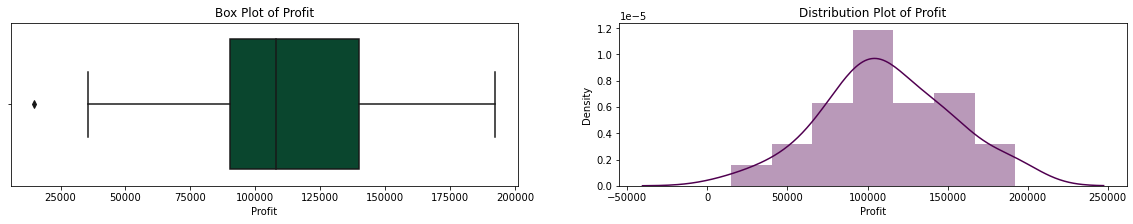

In [22]:
#Box Plot and Distribution Plot for Dependent variable PROFIT
plt.figure(figsize=(20,3))

plt.subplot(1,2,1)
sns.boxplot(dataset.Profit,color='#005030')
plt.title('Box Plot of Profit')

plt.subplot(1,2,2)
sns.distplot(a=dataset.Profit,color='#500050')
plt.title('Distribution Plot of Profit')
plt.show()

In [23]:
dataset[dataset['Profit']<25000]

,R&D Spend,Administration,Marketing Spend,Profit
49,0.0,116983.8,45173.06,14681.4


* This is the outlier, since we see the R&D is higly correlated to the Proft
* Here R&D spend is zero so its obious the profit is very low for this startup

In [24]:
dataset[dataset['R&D Spend']<10000]

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


- After observing above few startup data, We can say that for Index 49 (which is Outlier) there is some error in Profit
- typo error maybe. Sonce Profit for other startups with very R&D Spend is much higher than this
- We will be removing the outlier from the dataset

In [25]:
dataset.drop(index=49,axis=0,inplace=True)
dataset.shape

(49, 4)

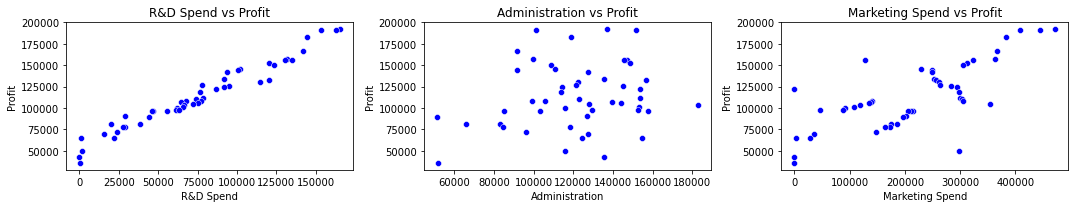

In [26]:
#Distribution Plot of independent variables an it seems  all variables are Normally distributed.
plt.figure(figsize=(20,3))
for i,col in zip(range(1,4),dataset.columns):
    plt.subplot(1,4,i)
    sns.scatterplot(x=col,y='Profit',data=dataset,color='blue')
    plt.title(f"{col} vs Profit")
    plt.tight_layout()

<AxesSubplot:title={'center':'Correlation Matrix'}>

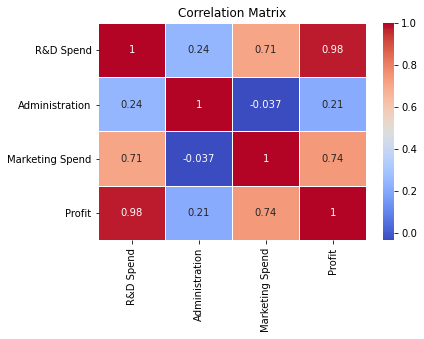

In [27]:
#we can see that R&D is highly linearly correalted with Profit
#let us look at correlation matrix
plt.title("Correlation Matrix")
sns.heatmap(data=dataset.corr(),annot=True,cmap='coolwarm',linewidths=0.1)

* We can see that R&D Spend and Marketing Spend are 0.98 and 0.75 correlated with Profit which is very high.
* And Adminstration Spend is very less correlated, so we can drop that feature for buliding model.
* Also, we can see that R&D and Marketing are correlated with 0.72 which is high => Multicollinearity in independent variables.

We cannot have Multicollinearity in the dataset

Text(0.5, 1.0, 'R&D Spend vs Marketing Spend')

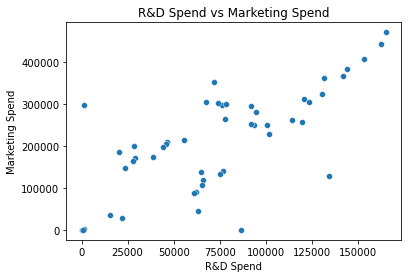

In [28]:
#This shows linear relationship between R&D Spend and Marketing Spend
sns.scatterplot(x='R&D Spend',y='Marketing Spend',data=dataset)
plt.title("R&D Spend vs Marketing Spend")

# Lasso and Ridge regression:

Now we need to select the X variables and the Y variable (Independent and Dependent)

In [6]:
#set independent variable by using all rows, but just column 1.
X = dataset.iloc[:, :-1].values

#set the dependent variable using all rows but only the last column. 
y = dataset.iloc[:, -1].values

#lets take a look at X right now.
X[0:10]

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62]])

- Next we need to scale down our X variables in order for our "alphas" to have an impact later when we introduce LASSO and RIDGE.


- We have two options, standardize and normalize. Since we don't know the distrobution of our data, we will use normalize.

In [7]:
X = normalize(X, 'l2')

X[0:10]

array([[0.31900633, 0.26411537, 0.91020769],
       [0.32756301, 0.30495941, 0.89426072],
       [0.34294681, 0.22606362, 0.91174707],
       [0.33862972, 0.2783483 , 0.89880595],
       [0.35238805, 0.22662705, 0.90799936],
       [0.33070362, 0.25030226, 0.9099362 ],
       [0.56834481, 0.62147181, 0.53921884],
       [0.34450073, 0.38477307, 0.85631123],
       [0.32960386, 0.40664771, 0.85205571],
       [0.35598308, 0.31368211, 0.88027245]])

In order to understand the effectiveness of Lasso and Ridge regression we will need a test set, so lets split our data into training and test sets.

In [8]:
#split the dataset.  Take 20% to be our test set. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

With the dataset split, we can now load and fit the models.

I will start with basic Linear Regression first.

In [9]:
#this sets the object regressor to the class of LinearRegression from the Sklearn library.
regressor = LinearRegression()

#this fits the model to our training data.
regressor.fit(X_train, y_train)

LinearRegression()

Now we can use the model to predict fit on the test set.

In [10]:
#Predict on our test set.
y_pred = regressor.predict(X_test)

Finally, we can evaluate the quality of the fit.

In [11]:
#calculate the R^2 score
score = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

#print out our score properly formatted as a percent.
print("R^2 score:", "{:.4f}%".format(score))
print("MSE", round(mse,2))

R^2 score: 0.8392%
MSE 205670606.12


- We get an R^2 score of 83%, which is pretty good, but the mean squared error looks super high.


- I would normally visualize this, but because we have 4 dimensions in the data that won't be possible.


- So let's move on and look at Lasso Regression and see if we can bring down the error.

In [12]:
alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha(a):
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train, y_train) 
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha(alpha)

ALPHA: -5.000 R2 SCORE: 0.8397% new_score, 205061686.8
ALPHA: -1.000 R2 SCORE: 0.8393% new_score, 205546470.6
ALPHA: 0.000 R2 SCORE: 0.8392% new_score, 205670618.5
ALPHA: 0.001 R2 SCORE: 0.8392% new_score, 205670730.0
ALPHA: 0.010 R2 SCORE: 0.8392% new_score, 205671845.2
ALPHA: 1.000 R2 SCORE: 0.8391% new_score, 205795142.4
ALPHA: 5.000 R2 SCORE: 0.8387% new_score, 206305683.4


C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26607979245.494476, tolerance: 6549883.634226939
  model = cd_fast.enet_coordinate_descent(
C:\Users\Hp\anaconda3\envs\digit\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26740591411.980232, tolerance: 6549883.634226939
  model = cd_fast.enet_coordinate_descent(


- Here we see that Lasso only slightly improved the accuracy of the model in the base case scenario. Specifically where the Alpha was a large negative value. This means that the true distrubtion actually has a higher slope than our inital model predicted.

- Now lets move on to ridge.

In [13]:
alphas = [-5, -1, 1e-4, 1e-3, 1e-2, 1, 5]

def test_alpha_ridge(a):
    model_lasso = Ridge(alpha=a)
    model_lasso.fit(X_train, y_train) 
    pred_test_lasso = model_lasso.predict(X_test)
    new_score = r2_score(y_test, pred_test_lasso)
    new_mse = mean_squared_error(y_test, pred_test_lasso)
    print('ALPHA: {:.3f} R2 SCORE: {:.4f}% new_score, {:.1f}'.format(a, new_score, new_mse))
    
    
for alpha in alphas:
    test_alpha_ridge(alpha)

ALPHA: -5.000 R2 SCORE: -15.2992% new_score, 20844955457.2
ALPHA: -1.000 R2 SCORE: -3.0518% new_score, 5181830329.8
ALPHA: 0.000 R2 SCORE: 0.8391% new_score, 205719113.4
ALPHA: 0.001 R2 SCORE: 0.8388% new_score, 206160876.0
ALPHA: 0.010 R2 SCORE: 0.8350% new_score, 211030627.8
ALPHA: 1.000 R2 SCORE: 0.4925% new_score, 649026376.4
ALPHA: 5.000 R2 SCORE: 0.2125% new_score, 1007154398.1


Here we see that Ridge is much more sensitive to the scale of Alpha, so lets fine tune it using only positive values.

In [14]:
new_alphas = [1e-15,1e-10,1e-8,1e-4, 1e-3, 1e-2, 1]

for alpha in new_alphas:
    test_alpha_ridge(alpha)

ALPHA: 0.000 R2 SCORE: 0.8392% new_score, 205670606.1
ALPHA: 0.000 R2 SCORE: 0.8392% new_score, 205670606.2
ALPHA: 0.000 R2 SCORE: 0.8392% new_score, 205670611.0
ALPHA: 0.000 R2 SCORE: 0.8391% new_score, 205719113.4
ALPHA: 0.001 R2 SCORE: 0.8388% new_score, 206160876.0
ALPHA: 0.010 R2 SCORE: 0.8350% new_score, 211030627.8
ALPHA: 1.000 R2 SCORE: 0.4925% new_score, 649026376.4


- Here we see that Lasso and Ridge Regression in this case DO NOT significantly improve the overall fit of the model.


- This is to be expected in some situations, but it is always great to check and verify when trying to fine tune our regression model.